In [13]:
def visualize_route_zoomed(result: Dict, start: Tuple, end: Tuple, title: str = "Maritime Route"):
    """Visualize the optimized route (zoomed view)"""
    fig, ax = plt.figure(figsize=(10, 8)), plt.gca()
    
    route = result['route']
    lats, lons = zip(*route)
    
    ax.plot(lons, lats, 'g-', linewidth=2, label='Optimized Route', zorder=3)
    ax.plot([start[1], end[1]], [start[0], end[0]], 'b--', linewidth=1, 
            alpha=0.5, label='Direct Route', zorder=2)
    ax.plot(start[1], start[0], 'go', markersize=10, label='Origin', zorder=4)
    ax.plot(end[1], end[0], 'ro', markersize=10, label='Destination', zorder=4)
    
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'{title}\n{result["total_distance_nm"]:.0f} NM, {result["waypoint_count"]} waypoints')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    return fig


def visualize_graph(result: Dict, start: Tuple, end: Tuple):
    """Visualize the navigation graph connectivity"""
    fig, ax = plt.figure(figsize=(12, 8)), plt.gca()
    
    G = result['graph']
    nodes = result['nodes']
    
    if len(nodes) > 0:
        node_lats = [n[0] for n in nodes]
        node_lons = [n[1] for n in nodes]
        ax.scatter(node_lons, node_lats, c='lightblue', s=20, alpha=0.5, zorder=1)
        
        # Sample edges to avoid overcrowding
        edge_sample = list(G.edges())#[:500]
        for u, v in edge_sample:
            n1, n2 = nodes[u], nodes[v]
            ax.plot([n1[1], n2[1]], [n1[0], n2[0]], 'gray', 
                    linewidth=0.3, alpha=0.3, zorder=1)
        
        if 'path_indices' in result:
            path_coords = [nodes[i] for i in result['path_indices']]
            path_lats, path_lons = zip(*path_coords)
            ax.plot(path_lons, path_lats, 'g-', linewidth=2, zorder=3)
            ax.scatter(path_lons, path_lats, c='green', s=50, zorder=4)
        
        if 'start_idx' in result:
            start_node = nodes[result['start_idx']]
            ax.plot(start_node[1], start_node[0], 'go', markersize=12, zorder=5)
        if 'end_idx' in result:
            end_node = nodes[result['end_idx']]
            ax.plot(end_node[1], end_node[0], 'ro', markersize=12, zorder=5)
    
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'Navigation Graph\n{len(nodes)} nodes, {G.number_of_edges()} edges')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    return fig


def visualize_world_map(result: Dict, start: Tuple, end: Tuple, title: str = "Maritime Route"):
    """Visualize the route on a world map with geographic context"""
    route = result['route']
    lats, lons = zip(*route)
    
    try:
        import cartopy.crs as ccrs
        import cartopy.feature as cfeature
        
        fig = plt.figure(figsize=(16, 10))
        ax = plt.axes(projection=ccrs.PlateCarree())
        
        # Add map features
        ax.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black', linewidth=0.5)
        ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
        ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
        ax.add_feature(cfeature.BORDERS, linestyle=':', alpha=0.5)
        ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.3)
        
        # Plot route
        ax.plot(lons, lats, 'g-', linewidth=2, transform=ccrs.PlateCarree(), 
                label='Optimized Route', zorder=3)
        ax.plot([start[1], end[1]], [start[0], end[0]], 'b--', linewidth=1.5, 
                alpha=0.7, transform=ccrs.PlateCarree(), label='Direct Route', zorder=2)
        
        # Plot start/end points
        ax.plot(start[1], start[0], 'go', markersize=12, transform=ccrs.PlateCarree(), 
                label='Origin', zorder=4)
        ax.plot(end[1], end[0], 'ro', markersize=12, transform=ccrs.PlateCarree(), 
                label='Destination', zorder=4)
        
        # Set extent with padding
        pad = 10
        ax.set_extent([min(min(lons), start[1], end[1]) - pad,
                      max(max(lons), start[1], end[1]) + pad,
                      min(min(lats), start[0], end[0]) - pad,
                      max(max(lats), start[0], end[0]) + pad], 
                     crs=ccrs.PlateCarree())
        
        ax.legend(loc='upper left')
        ax.set_title(f'{title} - World Map View\n{result["total_distance_nm"]:.0f} NM')
        
    except ImportError:
        print("⚠ Cartopy not installed. Using simple matplotlib plot.")
        fig, ax = plt.figure(figsize=(16, 10)), plt.gca()
        
        ax.plot(lons, lats, 'g-', linewidth=2, label='Optimized Route', zorder=3)
        ax.plot([start[1], end[1]], [start[0], end[0]], 'b--', linewidth=1.5, 
                alpha=0.7, label='Direct Route', zorder=2)
        ax.plot(start[1], start[0], 'go', markersize=12, label='Origin', zorder=4)
        ax.plot(end[1], end[0], 'ro', markersize=12, label='Destination', zorder=4)
        
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        ax.set_title(f'{title} - World Map View (install cartopy for better visualization)\n{result["total_distance_nm"]:.0f} NM')
        ax.grid(True, alpha=0.3)
        ax.legend()
    
    plt.tight_layout()
    plt.show()
    return fig


def visualize_all(result: Dict, start: Tuple, end: Tuple, title: str = "Maritime Route"):
    """Visualize all three views separately"""
    print(f"\n{'='*60}")
    print(f"Generating visualizations for: {title}")
    print(f"{'='*60}\n")
    
    fig1 = visualize_route_zoomed(result, start, end, title)
    fig2 = visualize_graph(result, start, end)
    fig3 = visualize_world_map(result, start, end, title)
    
    return fig1, fig2, fig3


✓ Loaded 11 land polygons

Route: (31.2304, 121.4737) → (35.6532, 139.8395)
Grid: 480 points checked → 346 water nodes, 134 land
Graph: 346 nodes, 1165 edges (avg degree: 6.7)
Grid structure: 8-connected (N/S/E/W + diagonals)
Nearest to (31.2304, 121.4737): node 26 at 51.34 NM
Nearest to (35.6532, 139.8395): node 253 at 31.06 NM
✓ Path found: 18 waypoints
  Distance: 974.9 NM (direct: 956.0 NM)
  Detour: +2.0%
18

Generating visualizations for: Shanghai → Tokyo



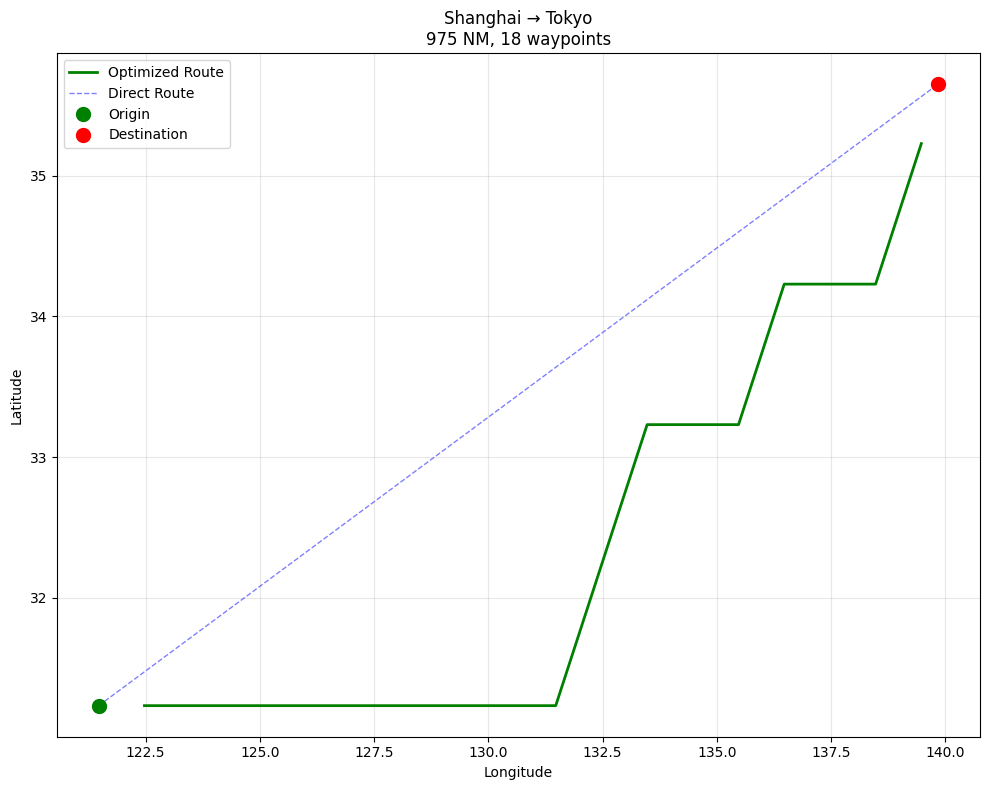

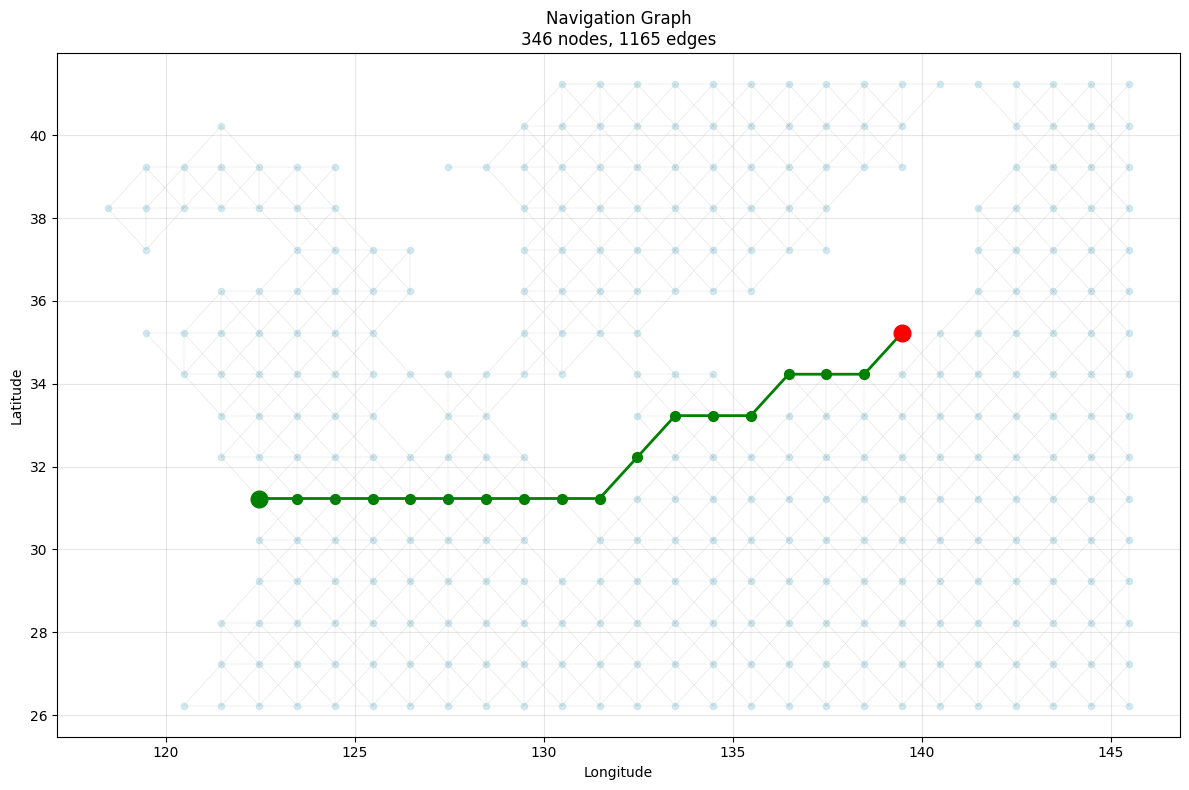

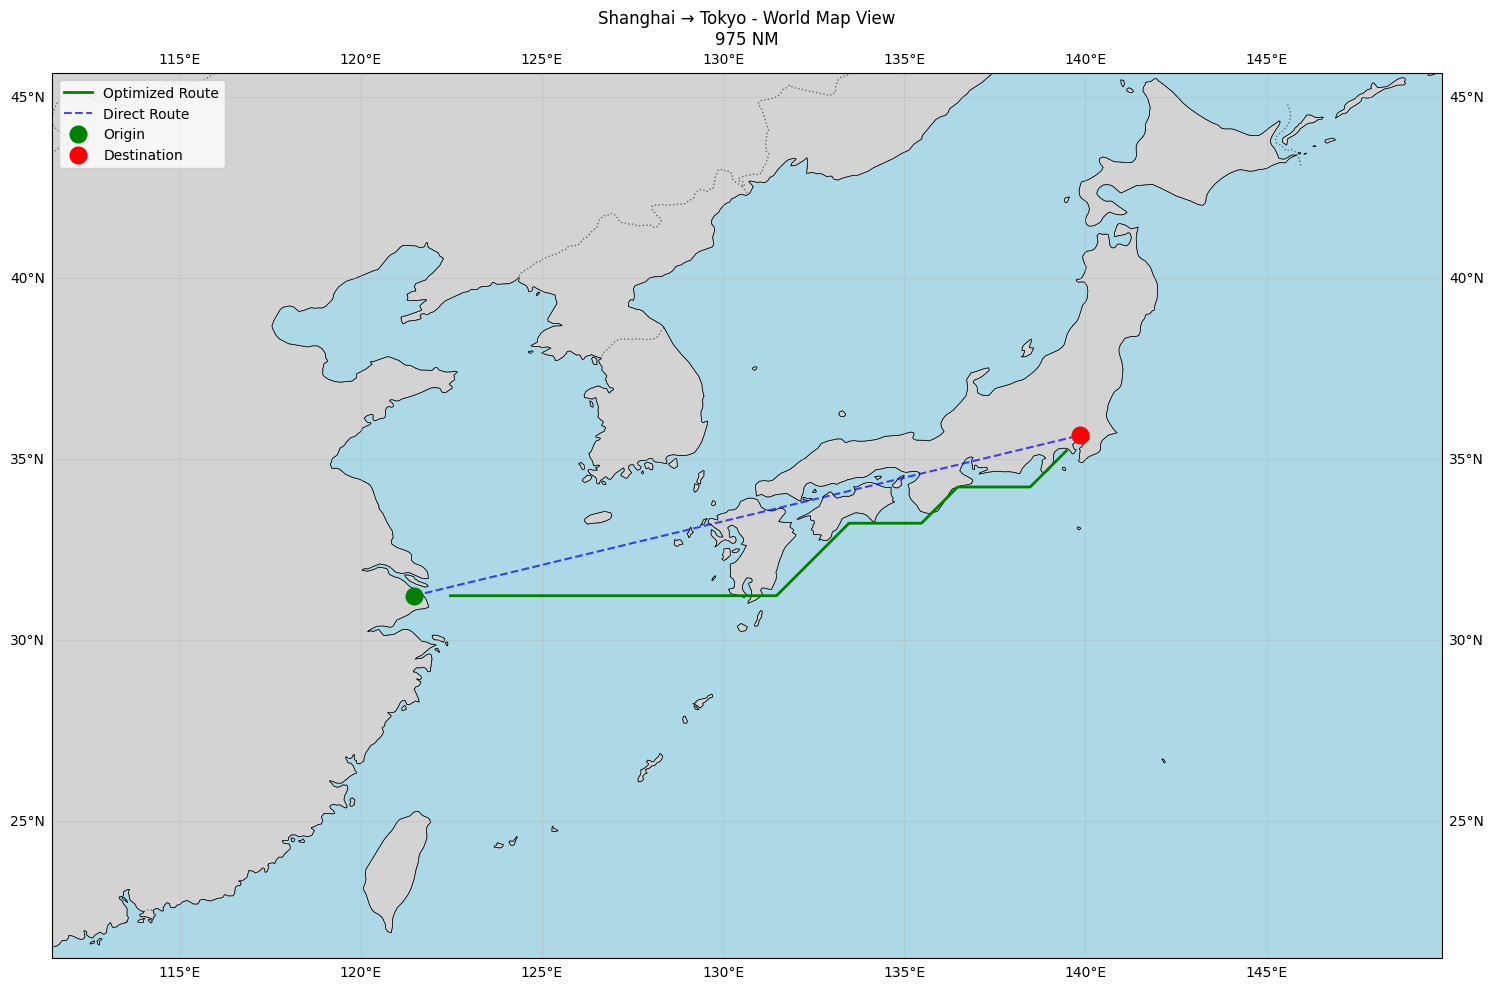

In [17]:
import numpy as np
import networkx as nx
from haversine import haversine
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict

class BathymetryRouter:
    """Advanced router using bathymetry and land avoidance"""
    
    def __init__(self, bathymetry_path: str = None, resolution: float = 0.5):
        """
        Initialize router with optional bathymetry data
        
        Args:
            bathymetry_path: Path to ETOPO or GEBCO bathymetry file
            resolution: Grid resolution in degrees (0.5° = ~55km at equator)
        """
        self.resolution = resolution
        self.bathymetry = None
        self.land_polygons = None
        
        # Load land polygons for collision avoidance
        try:
            url = "https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip"
            self.land_polygons = gpd.read_file(f"zip+{url}")
            print(f"✓ Loaded {len(self.land_polygons)} land polygons")
        except Exception as e:
            print(f"⚠ Warning: Could not load land polygons: {e}")
    
    def is_on_land(self, lon: float, lat: float) -> bool:
        """Check if point is on land"""
        if self.land_polygons is None or self.land_polygons.empty:
            return False
        
        try:
            point = Point(lon, lat)
            result = self.land_polygons.geometry.contains(point)
            return result.any()
        except Exception as e:
            return False
    
    def generate_water_grid(self, start: Tuple[float, float], 
                           end: Tuple[float, float]) -> List[Tuple[float, float]]:
        """
        Generate grid of water waypoints between start and end
        
        Returns:
            List of (lat, lon) tuples representing navigable water nodes
        """
        # Define bounding box with padding
        min_lon = min(start[1], end[1]) - 5
        max_lon = max(start[1], end[1]) + 5
        min_lat = min(start[0], end[0]) - 5
        max_lat = max(start[0], end[0]) + 5
        
        # Generate grid
        lons = np.arange(min_lon, max_lon + self.resolution, self.resolution)
        lats = np.arange(min_lat, max_lat + self.resolution, self.resolution)
        
        water_nodes = []
        total_checked = 0
        land_count = 0
        
        for lon in lons:
            for lat in lats:
                total_checked += 1
                if not self.is_on_land(lon, lat):
                    water_nodes.append((lat, lon))  # (lat, lon) format
                else:
                    land_count += 1
        
        print(f"Grid: {total_checked} points checked → {len(water_nodes)} water nodes, {land_count} land")
        return water_nodes
    
    def compute_edge_weight(self, node_a: Tuple[float, float], 
                           node_b: Tuple[float, float],
                           use_bathymetry: bool = False) -> float:
        """
        Compute weighted cost between two nodes
        
        Base: nautical mile distance
        """
        base_dist = haversine(node_a, node_b, unit='nmi')
        return base_dist
    
    def build_graph(self, nodes: List[Tuple[float, float]], 
               max_connect_dist: float = 4.0) -> nx.Graph:
        """
        Build navigation graph with 8-connectivity grid structure
        Each node connects to its 8 neighbors: N, S, E, W, NE, NW, SE, SW
        
        Args:
            nodes: List of (lat, lon) water waypoints
            max_connect_dist: Maximum connection distance in degrees
        
        Returns:
            NetworkX graph with 8-connected grid structure
        """
        G = nx.Graph()
        
        # Create a mapping from (lat, lon) to node index for quick lookup
        node_dict = {(round(lat, 6), round(lon, 6)): i for i, (lat, lon) in enumerate(nodes)}
        edges_added = 0
        
        # Define 8 directions: [N, S, E, W, NE, NW, SE, SW]
        directions = [
            (self.resolution, 0),      # North
            (-self.resolution, 0),     # South
            (0, self.resolution),      # East
            (0, -self.resolution),     # West
            (self.resolution, self.resolution),    # Northeast
            (self.resolution, -self.resolution),   # Northwest
            (-self.resolution, self.resolution),   # Southeast
            (-self.resolution, -self.resolution),  # Southwest
        ]
        
        for i, (lat, lon) in enumerate(nodes):
            # Check all 8 directions
            for dlat, dlon in directions:
                neighbor_lat = round(lat + dlat, 6)
                neighbor_lon = round(lon + dlon, 6)
                neighbor_key = (neighbor_lat, neighbor_lon)
                
                # If neighbor exists in our water nodes
                if neighbor_key in node_dict:
                    j = node_dict[neighbor_key]
                    
                    # Only add edge once (undirected graph)
                    if i < j:
                        node_a = nodes[i]
                        node_b = nodes[j]
                        
                        weight = self.compute_edge_weight(node_a, node_b)
                        distance_nm = haversine(node_a, node_b, unit='nmi')
                        
                        G.add_edge(
                            i, j,
                            weight=weight,
                            distance=distance_nm,
                            depth_penalty=1.0
                        )
                        edges_added += 1
        
        avg_degree = 2 * G.number_of_edges() / G.number_of_nodes() if G.number_of_nodes() > 0 else 0
        print(f"Graph: {len(nodes)} nodes, {edges_added} edges (avg degree: {avg_degree:.1f})")
        print(f"Grid structure: 8-connected (N/S/E/W + diagonals)")
        return G
    
    def find_nearest_node(self, coord: Tuple[float, float], 
                         nodes: List[Tuple[float, float]]) -> int:
        """Find nearest node index to given coordinates"""
        distances = [haversine(coord, node, unit='nmi') for node in nodes]
        nearest_idx = int(np.argmin(distances))
        nearest_dist = distances[nearest_idx]
        print(f"Nearest to {coord}: node {nearest_idx} at {nearest_dist:.2f} NM")
        return nearest_idx
    
    def optimize_route(self, start_coords: Tuple[float, float], 
                      end_coords: Tuple[float, float],
                      max_connect_dist: float = 4.0) -> Dict:
        """
        Compute optimal maritime route
        
        Args:
            start_coords: (lat, lon) origin
            end_coords: (lat, lon) destination
            max_connect_dist: Maximum edge connection distance in degrees
        
        Returns:
            Dictionary with route data and graph
        """
        print(f"\n{'='*60}")
        print(f"Route: {start_coords} → {end_coords}")
        print(f"{'='*60}")
        
        # Generate water grid
        nodes = self.generate_water_grid(start_coords, end_coords)
        
        if len(nodes) < 2:
            print("⚠ Insufficient water nodes!")
            return {
                "route": [start_coords, end_coords],
                "total_distance_nm": round(haversine(start_coords, end_coords, unit='nmi'), 2),
                "waypoint_count": 2,
                "nodes": nodes,
                "graph": nx.Graph(),
                "warning": "Insufficient water nodes"
            }
        
        # Build graph
        G = self.build_graph(nodes, max_connect_dist)
        
        if G.number_of_edges() == 0:
            print("⚠ No edges in graph!")
            return {
                "route": [start_coords, end_coords],
                "total_distance_nm": round(haversine(start_coords, end_coords, unit='nmi'), 2),
                "waypoint_count": 2,
                "nodes": nodes,
                "graph": G,
                "warning": "No edges"
            }
        
        # Find nearest nodes to start/end
        start_idx = self.find_nearest_node(start_coords, nodes)
        end_idx = self.find_nearest_node(end_coords, nodes)
        
        # Find optimal path
        try:
            path_indices = nx.astar_path(
                G,
                start_idx,
                end_idx,
                heuristic=lambda n1, n2: haversine(nodes[n1], nodes[n2], unit='nmi'),
                weight='weight'
            )
            
            print(f"✓ Path found: {len(path_indices)} waypoints")
            
            # Extract coordinates
            route_coords = [nodes[i] for i in path_indices]
            
            # Calculate metrics
            total_distance = sum(
                G[path_indices[i]][path_indices[i+1]]['distance']
                for i in range(len(path_indices) - 1)
            )
            
            direct_distance = haversine(start_coords, end_coords, unit='nmi')
            detour_pct = ((total_distance / direct_distance) - 1) * 100
            
            print(f"  Distance: {total_distance:.1f} NM (direct: {direct_distance:.1f} NM)")
            print(f"  Detour: +{detour_pct:.1f}%")
            
            return {
                "route": route_coords,
                "total_distance_nm": round(total_distance, 2),
                "waypoint_count": len(route_coords),
                "nodes": nodes,
                "graph": G,
                "path_indices": path_indices,
                "start_idx": start_idx,
                "end_idx": end_idx
            }
        
        except nx.NetworkXNoPath:
            print(f"✗ No path between node {start_idx} and {end_idx}")
            return {
                "route": [start_coords, end_coords],
                "total_distance_nm": round(haversine(start_coords, end_coords, unit='nmi'), 2),
                "waypoint_count": 2,
                "nodes": nodes,
                "graph": G,
                "start_idx": start_idx,
                "end_idx": end_idx,
                "warning": "No path found"
            }



# Example usage in Jupyter:
if __name__ == "__main__":
    # Initialize router
    router = BathymetryRouter(resolution=1)
    
    # Test different routes
    routes = [
        ("Shanghai → Tokyo", (31.2304, 121.4737), (35.6532, 139.8395)),
        #("Singapore → Shanghai", (1.3521, 103.8198), (31.2304, 121.4737)),
        #("Singapore → Rotterdam", (1.3521, 103.8198), (51.9244, 4.4777)),
        #("New York → Rotterdam", (40.6692, -74.0445), (51.9244, 4.4777)),
        #("Los Angeles → Tokyo", (33.7405, -118.2713), (35.6532, 139.8395)),
    ]
    
    for name, origin, dest in routes:
        result = router.optimize_route(origin, dest, max_connect_dist=4.0)
        print(len(result["route"]))
        visualize_all(result, origin, dest, name)
        print()

In [ ]:
# Cell 1: Import and initialize
from route_optimization_experiment import BathymetryRouter, visualize_route

router = BathymetryRouter(resolution=0.5)  # Try 0.25, 0.5, 1.0, 2.0

# Cell 2: Test a route
origin = (1.3521, 103.8198)  # Singapore
destination = (31.2304, 121.4737)  # Shanghai

result = router.optimize_route(origin, destination, max_connect_dist=4.0)
visualize_route(result, origin, destination, "Singapore → Shanghai")

# Cell 3: Analyze the graph
G = result['graph']
print(f"Nodes: {G.number_of_nodes()}")
print(f"Edges: {G.number_of_edges()}")
print(f"Density: {nx.density(G):.4f}")
print(f"Connected: {nx.is_connected(G)}")

# Cell 4: Try different parameters
for resolution in [0.25, 0.5, 1.0]:
    router = BathymetryRouter(resolution=resolution)
    result = router.optimize_route(origin, destination)
    print(f"Resolution {resolution}°: {result['waypoint_count']} waypoints, "
          f"{result['total_distance_nm']:.0f} NM")